In [309]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [310]:
powercon_data = pd.read_csv("powerconsumption.csv")
powercon_data.head()
# powercon_data = powercon_data.sample(frac=0.1, random_state=42)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [311]:
powercon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [312]:
features = powercon_data[["Temperature","Humidity","WindSpeed","GeneralDiffuseFlows","DiffuseFlows"]]
target1 = powercon_data["PowerConsumption_Zone1"]
target2 = powercon_data["PowerConsumption_Zone2"]
target3 = powercon_data["PowerConsumption_Zone3"]

In [313]:
X_train_Zone1,X_test_Zone1,Y_train_Zone1,Y_test_Zone1 = train_test_split(features,target1,test_size=0.2,random_state=42)
X_train_Zone2,X_test_Zone2,Y_train_Zone2,Y_test_Zone2 = train_test_split(features,target2,test_size=0.2,random_state=42)
X_train_Zone3,X_test_Zone3,Y_train_Zone3,Y_test_Zone3 = train_test_split(features,target3,test_size=0.2,random_state=42)

In [314]:
model1 = model2 = model3 = LinearRegression()

In [315]:
model1.fit(X_train_Zone1,Y_train_Zone1)
model2.fit(X_train_Zone2,Y_train_Zone2)
model3.fit(X_train_Zone3,Y_train_Zone3)

LinearRegression()

In [316]:
prediction_Zone1 = model1.predict(X_test_Zone1)
prediction_Zone2 = model2.predict(X_test_Zone2)
prediction_Zone3 = model3.predict(X_test_Zone3)

In [317]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_Zone1 = mean_squared_error(Y_test_Zone1, prediction_Zone1)
mae_Zone1 = mean_absolute_error(Y_test_Zone1, prediction_Zone1)
mse_Zone2 = mean_squared_error(Y_test_Zone2, prediction_Zone2)
mae_Zone2 = mean_absolute_error(Y_test_Zone2, prediction_Zone2)
mse_Zone3 = mean_squared_error(Y_test_Zone3, prediction_Zone3)
mae_Zone3 = mean_absolute_error(Y_test_Zone3, prediction_Zone3)

Mean Squared Error: 253599783.06072342
Mean Absolute Error: 14564.334544244652
R^2 Score: -402.23%


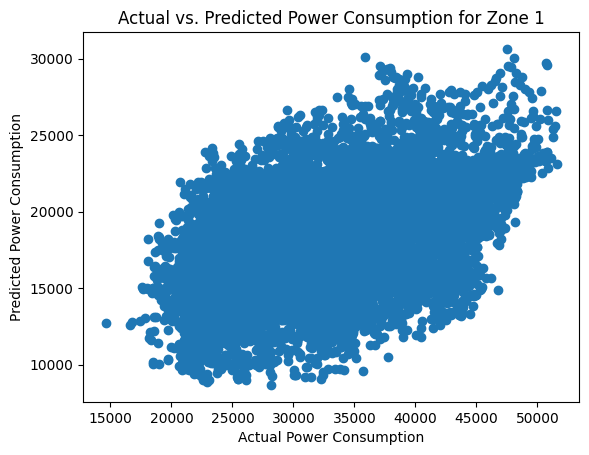

In [318]:
plt.scatter(Y_test_Zone1, prediction_Zone1)
r2 = r2_score(Y_test_Zone1, prediction_Zone1)

print(f'Mean Squared Error: {mse_Zone1}')
print(f'Mean Absolute Error: {mae_Zone1}')
print(f'R^2 Score: {r2 * 100:.2f}%')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs. Predicted Power Consumption for Zone 1')
plt.show()


Mean Squared Error: 35878013.919574
Mean Absolute Error: 4744.842886033468
R^2 Score: -32.93%


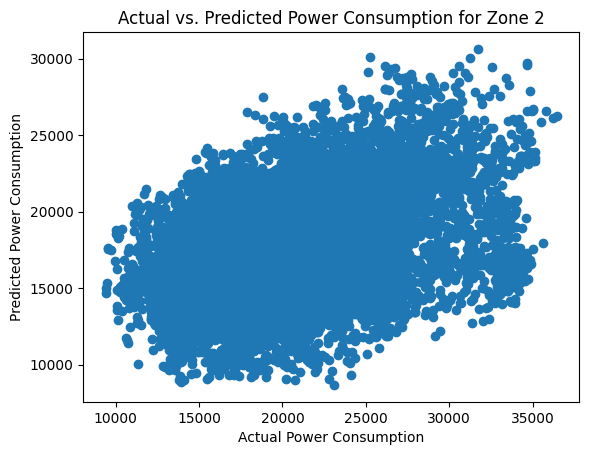

In [319]:
plt.scatter(Y_test_Zone2, prediction_Zone2)
r2 = r2_score(Y_test_Zone2, prediction_Zone2)

print(f'Mean Squared Error: {mse_Zone2}')
print(f'Mean Absolute Error: {mae_Zone2}')
print(f'R^2 Score: {r2 * 100:.2f}%')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs. Predicted Power Consumption for Zone 2')
plt.show()


Mean Squared Error: 35878013.919574
Mean Absolute Error: 4744.842886033468
R^2 Score: -32.93%


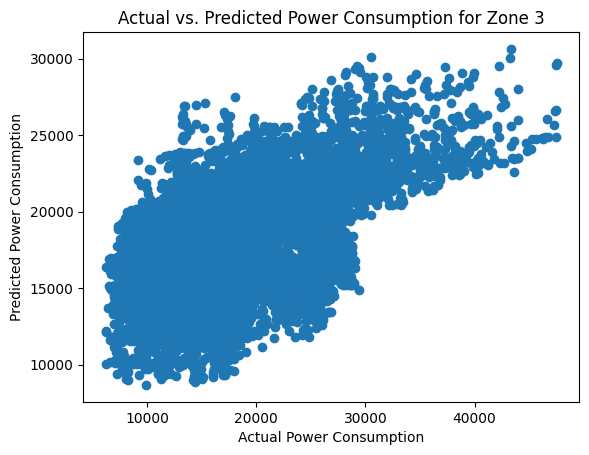

In [320]:
plt.scatter(Y_test_Zone3,prediction_Zone3)
r2 = r2_score(Y_test_Zone2, prediction_Zone2)

print(f'Mean Squared Error: {mse_Zone2}')
print(f'Mean Absolute Error: {mae_Zone2}')
print(f'R^2 Score: {r2 * 100:.2f}%')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs. Predicted Power Consumption for Zone 3')
plt.show()